# TF와 TF-IDF --> 정보 검색(IR, Information Retrieval) 분야에서 역사가 깊으며, 상용 NLP 시스템에서도 활발히 사용함.
## 문서 빈도 (TF, Term-Frequency)
## 문서 빈도 - 역문서 빈도 (TF-IDF, Term Frequency - Inverse Term Frequency)
### claim과 같은 흔한 단어에는 특정 특허와 관련한 어떠한 정보도 담겨있지 않지만, 반대로 희귀한 단어는 자주 나오지 않지만 특허 문서의 특징을 잘 나타냄. 이런 상황에서는 역문서 빈도가 적합함.

<Axes: >

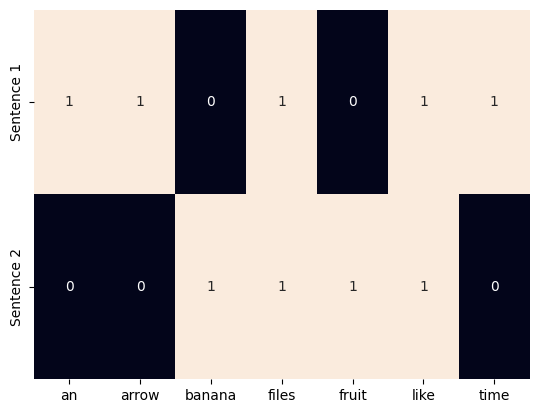

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# corpus = 말뭉치
corpus = ['Time files like an arrow.',
          'Fruit files like a banana.']

# binary = True로 해서 원-핫 인코딩 진행
# 원-핫 표현: 0 벡터에서 시작해 문장이나 문서에 등장하는 단어에 상응하는 원소를 1로 설정함
one_hot_vectorizer = CountVectorizer(binary = True)

# CountVectorizer는 희소 행렬(sparse matrix)을 반환하므로 toarray() 메서드를 사용해 밀집 행렬(dense matrix)로 변환
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer.get_feature_names_out()

sns.heatmap(one_hot, annot = True,
            cbar = False, xticklabels = vocab,
            yticklabels = ['Sentence 1', 'Sentence 2'])

<Axes: >

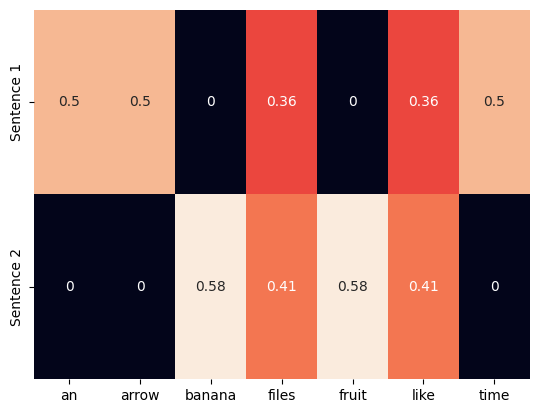

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot = True, cbar = False, xticklabels = vocab,
            yticklabels = ['Sentence 1', 'Sentence 2'])

# 텐서 만들기

In [3]:
!pip3 install torch
!pip3 install torchvision

In [4]:
import torch
import torchvision

In [5]:
def describe(x):
    print('타입: {}'.format(x.type()))
    print('크기: {}'.format(x.shape))
    print('값: {}'.format(x))

In [6]:
describe(torch.Tensor(2, 3))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[-1.0409e-37,  3.2565e-41,  6.1887e+31],
        [ 1.5290e-12, -5.4407e-31,  4.4357e-41]])


In [7]:
# (0, 1) 범위의 균등 분포에서 샘플링한 값으로 랜덤하게 초기화한 텐서 만들기
describe(torch.rand(2, 3))

# '표준 정규 분포'에서 샘플링한 값으로 랜덤하게 초기화한 텐서 만들기
describe(torch.randn(2, 3))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[0.3817, 0.7619, 0.3100],
        [0.1853, 0.1048, 0.4759]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[-0.1695,  0.4196, -1.2168],
        [ 0.3464,  0.3322,  1.5839]])


In [8]:
# 0으로 채운 텐서 만들기
describe(torch.zeros(2, 3))

# 1로 채운 텐서 만들기
x = torch.ones(2, 3)
describe(x)

# 밑줄 문자(_)가 있는 파이토치 인-플레이스 메서드는 텐서값을 바꾸는 연산을 의미
x.fill_(5)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[0., 0., 0.],
        [0., 0., 0.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 1., 1.],
        [1., 1., 1.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [9]:
x = torch.Tensor([[1, 2, 3],
                  [4, 5, 6]])
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [10]:
import numpy as np

npy = np.random.rand(2, 3)
describe(torch.from_numpy(npy))
# numpy 배열의 기본 데이터 타입이 float64이기 때문에 텐서 타입이 FloatTensor가 아니라 DoubleTensor이다.

타입: torch.DoubleTensor
크기: torch.Size([2, 3])
값: tensor([[0.4057, 0.0087, 0.6236],
        [0.3783, 0.9500, 0.9480]], dtype=torch.float64)


# 텐서 타입과 크기

In [11]:
# 특정 텐서 타입의 생성자를 직접 호출
x = torch.FloatTensor([[1, 2, 3],
                      [4, 5, 6]])
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [12]:
x = x.long()
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[1, 2, 3],
        [4, 5, 6]])


In [13]:
# torch.tensor 메서드와 dtype 매개변수 사용
x = torch.tensor([[1, 2, 3],[4, 5, 6]], dtype = torch.int64)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[1, 2, 3],
        [4, 5, 6]])


In [14]:
x = x.float()
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 2., 3.],
        [4., 5., 6.]])


# 텐서 연산

In [15]:
x = torch.randn(2, 3)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[-0.6090, -0.5540,  1.6155],
        [ 1.0650, -0.0805,  1.3562]])


In [16]:
describe(torch.add(x, x))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[-1.2179, -1.1080,  3.2310],
        [ 2.1299, -0.1609,  2.7125]])


In [17]:
describe(x + x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[-1.2179, -1.1080,  3.2310],
        [ 2.1299, -0.1609,  2.7125]])


In [18]:
x = torch.arange(6)
describe(x)

타입: torch.LongTensor
크기: torch.Size([6])
값: tensor([0, 1, 2, 3, 4, 5])


In [19]:
x = x.view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5]])


In [20]:
describe(torch.sum(x, dim = 0))

타입: torch.LongTensor
크기: torch.Size([3])
값: tensor([3, 5, 7])


In [21]:
describe(torch.sum(x, dim = 1))

타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([ 3, 12])


In [22]:
describe(torch.transpose(x, 0, 1))

타입: torch.LongTensor
크기: torch.Size([3, 2])
값: tensor([[0, 3],
        [1, 4],
        [2, 5]])


# 인덱싱, 슬라이싱, 연결

In [23]:
x = torch.arange(6).view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5]])


In [24]:
describe(x[:1, :2])

타입: torch.LongTensor
크기: torch.Size([1, 2])
값: tensor([[0, 1]])


In [25]:
describe(x[0, 1])

타입: torch.LongTensor
크기: torch.Size([])
값: 1


In [26]:
indices = torch.LongTensor([0, 2])
describe(indices)
describe(torch.index_select(x, dim = 1, index = indices))

타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([0, 2])
타입: torch.LongTensor
크기: torch.Size([2, 2])
값: tensor([[0, 2],
        [3, 5]])


In [27]:
indices = torch.LongTensor([0, 0])
describe(indices)
describe(torch.index_select(x, dim = 0, index = indices))

타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([0, 0])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [0, 1, 2]])


In [28]:
row_indices = torch.arange(2).long()
describe(row_indices)
col_indices = torch.LongTensor([0, 1])
describe(col_indices)
describe(x[row_indices, col_indices])

# 인덱스는 LongTensor여야 함.

타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([0, 1])
타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([0, 1])
타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([0, 4])


In [29]:
x = torch.arange(6).view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5]])


In [30]:
describe(torch.cat([x, x], dim = 0))

타입: torch.LongTensor
크기: torch.Size([4, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])


In [31]:
describe(torch.cat([x, x], dim = 1))

타입: torch.LongTensor
크기: torch.Size([2, 6])
값: tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


In [32]:
describe(torch.stack([x, x]))

타입: torch.LongTensor
크기: torch.Size([2, 2, 3])
값: tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


In [33]:
x1 = torch.arange(6).view(2, 3)
x1 = x1.float()
describe(x1)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[0., 1., 2.],
        [3., 4., 5.]])


In [34]:
x2 = torch.ones(3, 2)
x2[:, 1] += 1
describe(x2)

타입: torch.FloatTensor
크기: torch.Size([3, 2])
값: tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


In [35]:
describe(torch.mm(x1, x2))

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: tensor([[ 3.,  6.],
        [12., 24.]])


# 텐서와 계산 그래프

In [36]:
# requires_grad 불리언 매개변수를 True로 하면 그래디언트 기반 학습에 필요한 손실 함수와 텐서의 그래디언트를 기록하는 부가 연산을 활성화함

x = torch.ones(2, 2, requires_grad = True)
describe(x)
print(x.grad is None)

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [37]:
y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


In [38]:
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

타입: torch.FloatTensor
크기: torch.Size([])
값: 21.0
False


In [39]:
x.grad

tensor([[2.2500, 2.2500],
        [2.2500, 2.2500]])

# CUDA 텐서

In [40]:
print(torch.cuda.is_available())

True


In [41]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [42]:
x = torch.rand(3, 3).to(device)
describe(x)

타입: torch.cuda.FloatTensor
크기: torch.Size([3, 3])
값: tensor([[0.1409, 0.7211, 0.7762],
        [0.3636, 0.8991, 0.9285],
        [0.1863, 0.2594, 0.8437]], device='cuda:0')


In [44]:
cpu_device = torch.device("cpu")
y = y.to(cpu_device)
x = x.to(cpu_device)
x + y

tensor([[0.7056, 1.2309, 0.8587],
        [0.9804, 1.5854, 1.8052],
        [0.4485, 1.2012, 1.7465]])